# MNIST Multi-Layer Perceptron

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
mnist.train.images.shape

(55000, 784)

In [11]:
sample = mnist.train.images[1].reshape(28,28)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

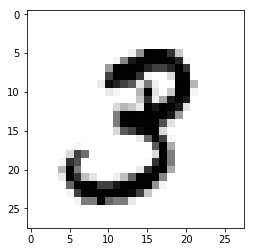

In [16]:
plt.imshow(sample, cmap='Greys')

In [17]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [18]:
n_classes = 10
n_samples = mnist.train.num_examples

In [19]:
n_input = 784

In [23]:
n_hidden_1 = 256
n_hidden_2 = 256

In [38]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # X * Weight + Bias_Value
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    
    # RELU(X * W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [61]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [63]:
weights

{'h1': <tf.Variable 'Variable_33:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_34:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_35:0' shape=(256, 10) dtype=float32_ref>}

In [41]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [42]:
x = tf.placeholder('float',[None, n_input])

In [43]:
y = tf.placeholder('float',[None, n_classes])

In [44]:
pred = multilayer_perceptron(x,weights,biases)

In [46]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the Model

In [64]:
t = mnist.train.next_batch(10)

In [65]:
t

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

mnist.train.next_batch(10) returns tuples representation of 10 samples of shape(784, ) and their classes represented in a list. 

For example:-

Xsamp, ysamp = t

Xsamp represents shape of each sample, 784 (28 * 28), and ysamp represents list of classes as 0 and 1 that corresponds to the number in image.

In [67]:
Xsamp, ysamp = t

In [70]:
Xsamp

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [71]:
Xsamp.shape

(10, 784)

In [69]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Run the Session

In [72]:
sess = tf.InteractiveSession()

In [74]:
init = tf.global_variables_initializer()

In [75]:
sess.run(init)

In [76]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)  #55000/100
    
    for i in range(total_batch):  # Iterates for 550 times
        batch_x, batch_y = mnist.train.next_batch(batch_size)  # Every next_batch will have size of 100
        
        _,c = sess.run([optimizer,cost], feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))
    
print ("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost158.6370
Epoch: 2 cost40.9708
Epoch: 3 cost25.6342
Epoch: 4 cost17.6895
Epoch: 5 cost12.7466
Epoch: 6 cost9.3406
Epoch: 7 cost7.0139
Epoch: 8 cost5.0554
Epoch: 9 cost3.8363
Epoch: 10 cost2.8142
Epoch: 11 cost2.1038
Epoch: 12 cost1.4788
Epoch: 13 cost1.2569
Epoch: 14 cost0.9195
Epoch: 15 cost0.7212
Model has completed 15 Epochs of training


## Model Evaluations

In [77]:
correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [78]:
print(correct_prediction[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [79]:
correct_prediction = tf.cast(correct_prediction, 'float')

In [80]:
print(correct_prediction[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [81]:
accuracy = tf.reduce_mean(correct_prediction)

In [82]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [83]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.94840002